<a href="https://colab.research.google.com/github/dudabattaglia/MVPAnalisedeDados/blob/main/MVP_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas_MariaEduardaBattaglia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Maria Eduarda Battaglia

**Matrícula:** 4052024002108

**Dataset:** [Kaggle - Spotify Dataset](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset?resource=download)



# Descrição do Problema

O conjunto de dados contém informações sobre mais de 114 mil faixas musicais do Spotify, incluindo atributos como dançabilidade, energia, popularidade, gênero e outros metadados. O objetivo principal é investigar padrões e relações entre atributos de músicas populares e menos populares.

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- Faixas com maior popularidade tendem a ter níveis específicos de energia, valência (positividade) e dançabilidade.
- A popularidade pode variar de acordo com o gênero e o tempo (tempo em BPM).
- Faixas explícitas podem ter padrões de popularidade diferentes das não explícitas.
- A distribuição dos atributos numéricos é representativa da população geral das músicas disponíveis na plataforma.


## Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de características, o objetivo é fazer uma análise exploratória e compreender os dados, identificar padrões e preparar o dataset para possíveis análises futuras.



## Seleção de Dados

Critérios adotados:

Remoção de colunas irrelevantes ou redundantes: Removi colunas como track_id, album_name, ou outras colunas com muitos valores ausentes ou que não agregam à análise dos atributos musicais.

Filtragem de linhas com valores ausentes: Removi valores ausentes, a depender da proporção. As colunas com mais de 30% de valores nulos foram eliminadas.

Foco em atributos numéricos e categóricos úteis: Mantive colunas como track_popularity, danceability, energy, valence, genre, explicit, entre outras, pois são diretamente ligadas às características musicais e ao objetivo de análise.

Essa seleção foi essencial para garantir que o dataset final contivesse apenas as informações mais relevantes para a análise exploratória e o pré-processamento, eliminando ruído e reduzindo a dimensionalidade do problema.

## Atributos do Dataset

O dataset Spotify contém mais de 114.000 faixas musicais de diferentes gêneros e artistas. Possui os seguintes atributos principais:

- ***track_name***: nome da faixa musical
- ***artists***: nome do artista
- ***popularity***: popularidade da música (escala de 0 a 100)
- ***duration_ms***: duração da faixa em milissegundos
- ***explicit***: se a faixa contém conteúdo explícito (0 = não, 1 = sim)
- ***danceability***: medida de dançabilidade da faixa (0 a 1)
- ***energy***: intensidade e atividade percebida na faixa (0 a 1)
- ***key***: tonalidade da música representada como número inteiro (0 = C, 1 = C#, ..., 11 = B)
- ***loudness***: volume médio da faixa em decibéis (dB)
- ***mode***: modo da escala (0 = menor, 1 = maior)
- ***speechiness***: presença de palavras faladas na faixa (0 a 1)
- ***acousticness***: probabilidade da faixa ser acústica (0 a 1)
- ***instrumentalness***: probabilidade da faixa ser instrumental (0 a 1)
- ***liveness***: probabilidade de a faixa ter sido gravada com presença de público (0 a 1)
- ***valence***: positividade ou emoção transmitida pela música (0 a 1)
- ***tempo***: andamento da música em batidas por minuto (BPM)
- ***track_genre***: gênero musical atribuído à faixa

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Spotify Tracks.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



In [44]:
# carregamento do datase
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dudabattaglia/MVPAnalisedeDados/refs/heads/main/dataset.csv', index_col=0)

In [45]:
# primeiras linhas
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset Spotify, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## Total e Tipo das Instâncias

O dataset Spotify possui mais de 114.000 instâncias (observações), representando faixas musicais de diversos artistas e gêneros.
A maior parte dos atributos de medição são de tipo numérico contínuo (float), como dançabilidade, energia, tempo e valência.

Além disso, existem atributos categóricos como 'explicit' (faixa com conteúdo explícito ou não), 'mode' (modo maior ou menor) e 'track_genre' (gênero musical).


In [46]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 114000

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness         

In [47]:
print("\nDados ausentes:")
print(df.isnull().sum())


Dados ausentes:
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


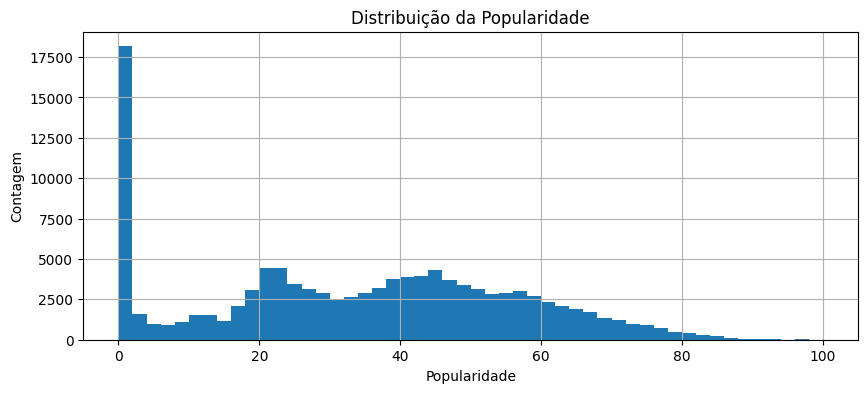

In [48]:
plt.figure(figsize=(10,4))
df['popularity'].hist(bins=50)
plt.title('Distribuição da Popularidade')
plt.xlabel('Popularidade')
plt.ylabel('Contagem')
plt.show()

O histograma mostra que uma grande quantidade de faixas possui popularidade igual a zero, indicando que muitas músicas disponíveis no Spotify têm pouca ou nenhuma relevância em termos de execução ou engajamento. À medida que a popularidade aumenta, a frequência de faixas diminui gradativamente, com poucos registros atingindo pontuações altas. Isso evidencia uma forte assimetria, onde apenas uma minoria das faixas é realmente muito popular.

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [49]:
# estatísticas descritivas básicas do dataset
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [50]:
# média dos atributos numéricos do dataset
df.describe().loc['mean']

,mean
popularity,33.238535
duration_ms,228029.153114
danceability,0.566800
energy,0.641383
key,5.309140
loudness,-8.258960
mode,0.637553
speechiness,0.084652
acousticness,0.314910
instrumentalness,0.156050


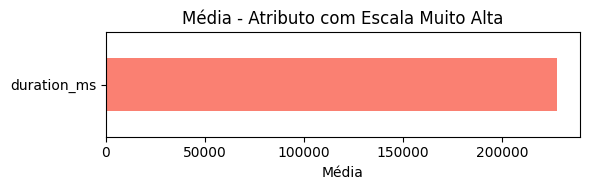

In [51]:
# Qual gráfico seria interessante usar pra mostrar a média?

# Atributos com escala muito alta
plt.figure(figsize=(6,2))
df[['duration_ms']].mean().plot(kind='barh', color='salmon')
plt.title('Média - Atributo com Escala Muito Alta')
plt.xlabel('Média')
plt.tight_layout()
plt.show()

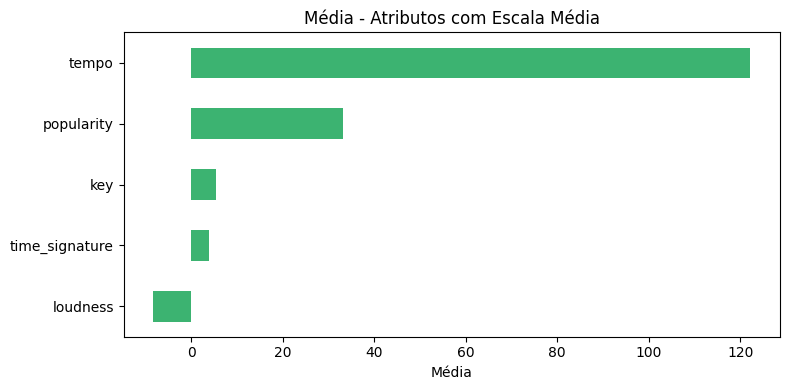

In [52]:
# Atributos com escala média
plt.figure(figsize=(8,4))
df[['tempo', 'popularity', 'key', 'time_signature', 'loudness']].mean().sort_values().plot(kind='barh', color='mediumseagreen')
plt.title('Média - Atributos com Escala Média')
plt.xlabel('Média')
plt.tight_layout()
plt.show()


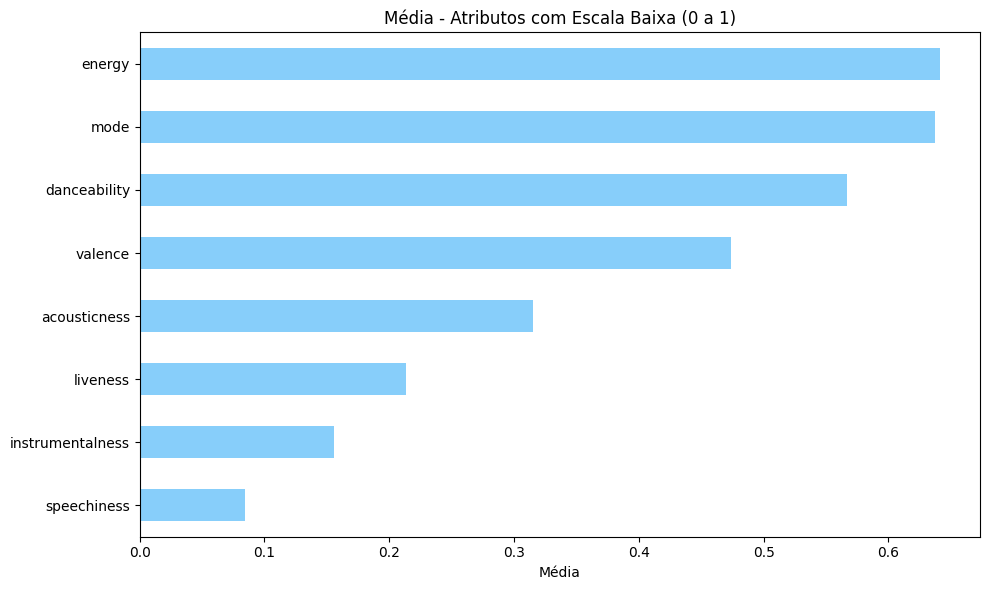

In [53]:
# Atributos com escala baixa [0-1]
plt.figure(figsize=(10,6))
df[['danceability', 'energy', 'valence', 'acousticness', 'liveness', 'speechiness', 'instrumentalness', 'mode']].mean().sort_values().plot(kind='barh', color='lightskyblue')
plt.title('Média - Atributos com Escala Baixa (0 a 1)')
plt.xlabel('Média')
plt.tight_layout()
plt.show()


### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [54]:
# desvio padrão dos atributos numéricos do dataset
df.describe().loc['std']

,std
popularity,22.305078
duration_ms,107297.712645
danceability,0.173542
energy,0.251529
key,3.559987
loudness,5.029337
mode,0.480709
speechiness,0.105732
acousticness,0.332523
instrumentalness,0.309555


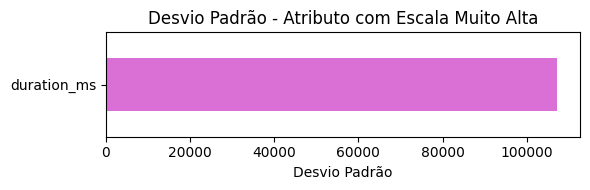

In [55]:
# Qual gráfico seria interessante usar pra mostrar o desvio padrão?

# Desvio padrão - Escala muito alta
plt.figure(figsize=(6, 2))
df[['duration_ms']].std().plot(kind='barh', color='orchid')
plt.title('Desvio Padrão - Atributo com Escala Muito Alta')
plt.xlabel('Desvio Padrão')
plt.tight_layout()
plt.show()



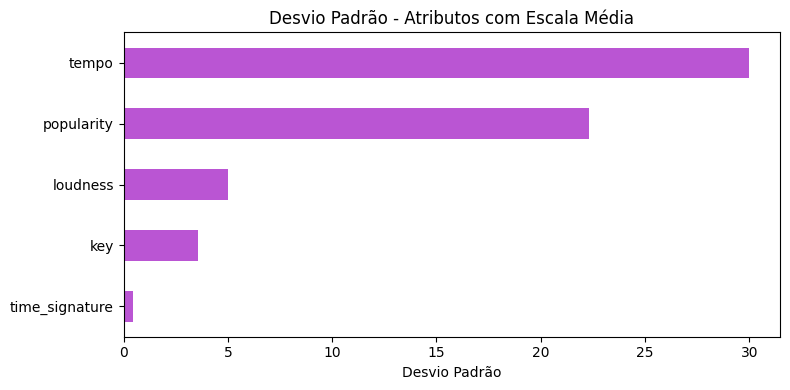

In [56]:
# Desvio padrão - Escala média
plt.figure(figsize=(8, 4))
df[['tempo', 'popularity', 'key', 'time_signature', 'loudness']].std().sort_values().plot(kind='barh', color='mediumorchid')
plt.title('Desvio Padrão - Atributos com Escala Média')
plt.xlabel('Desvio Padrão')
plt.tight_layout()
plt.show()



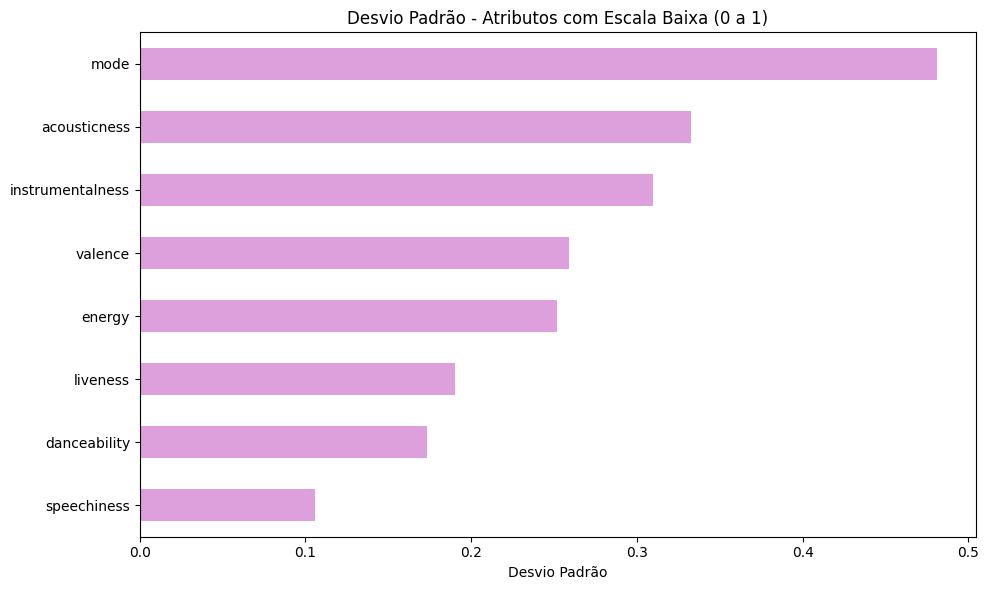

In [57]:
# Desvio padrão - Escala baixa [0-1]
plt.figure(figsize=(10, 6))
df[['danceability', 'energy', 'valence', 'acousticness', 'liveness', 'speechiness', 'instrumentalness', 'mode']].std().sort_values().plot(kind='barh', color='plum')
plt.title('Desvio Padrão - Atributos com Escala Baixa (0 a 1)')
plt.xlabel('Desvio Padrão')
plt.tight_layout()
plt.show()

## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

### *popularity*

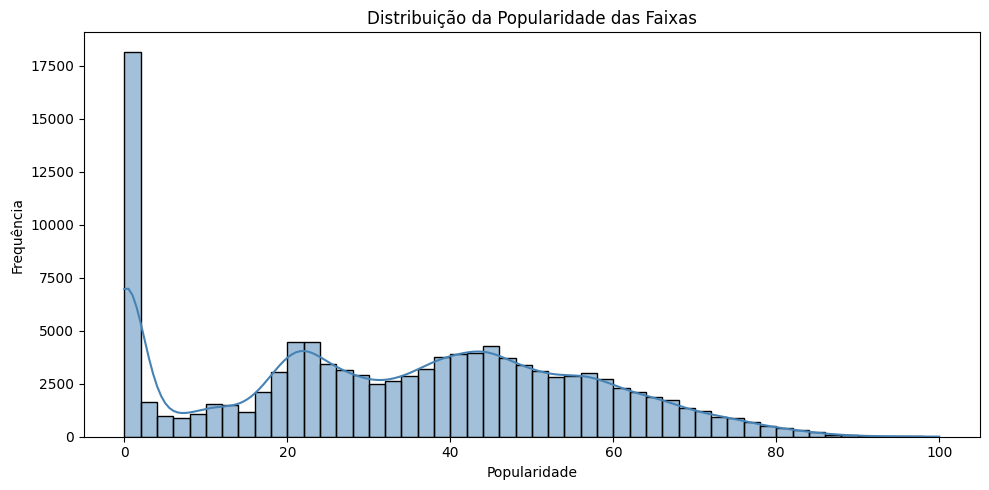

In [58]:
plt.figure(figsize=(10,5))
sns.histplot(df['popularity'], bins=50, kde=True, color='steelblue')
plt.title('Distribuição da Popularidade das Faixas')
plt.xlabel('Popularidade')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

O histograma mostra a distribuição da popularidade das faixas. A curva de densidade (KDE) indica que os dados são assimétricos
e altamente concentrados na popularidade baixa (próxima de zero), com poucos exemplos de faixas altamente populares. Isso revela
um viés na base, onde grande parte do conteúdo não atinge ampla audiência.

### *danceability*

Alguma curiosidade ou fato importante sobre o atributo que estamos olhando a distribuição?

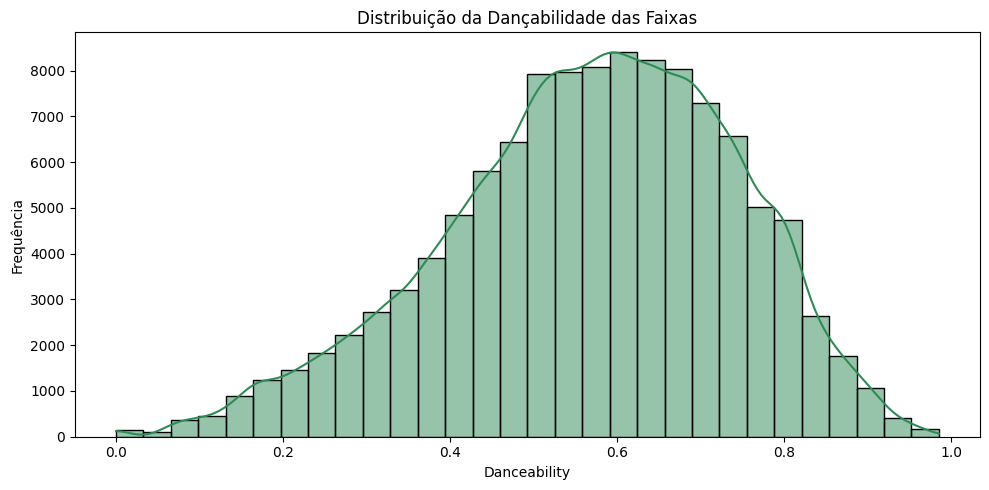

In [59]:
plt.figure(figsize=(10,5))
sns.histplot(df['danceability'], bins=30, kde=True, color='seagreen')
plt.title('Distribuição da Dançabilidade das Faixas')
plt.xlabel('Danceability')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

O histograma mostra que a dançabilidade das faixas segue uma distribuição aproximadamente simétrica, com leve concentração em valores entre 0.5 e 0.8. A curva de densidade (KDE) reforça essa tendência, indicando que grande parte das músicas possui características rítmicas e estruturais que favorecem a dança. Isso pode refletir uma preferência do mercado musical por faixas com apelo dançante, especialmente nas plataformas de streaming.

## Boxplot

Para entender as diferenças entre os gêneros, devemos olhar como se comportam os valores quando agrupados por gênero. Isso nos permite comparar a média, mediana e desvio padrão de cada característica para diferentes estilos musicais, além de visualizar suas distribuições por meio de boxplots.


In [60]:
# Estatísticas Descritivas Agrupadas por Gênero
print("\nEstatísticas descritivas agrupadas por gênero:")
print(df.groupby('track_genre').describe())


Estatísticas descritivas agrupadas por gênero:
            popularity                                                   \
                 count    mean        std  min    25%   50%   75%   max   
track_genre                                                               
acoustic        1000.0  42.483  16.541019  0.0  29.00  47.0  54.0  82.0   
afrobeat        1000.0  24.399  10.512579  0.0  18.00  21.0  28.0  75.0   
alt-rock        1000.0  33.943  31.153881  0.0   0.00  45.0  65.0  93.0   
alternative     1000.0  24.337  32.659517  0.0   0.00   1.0  64.0  93.0   
ambient         1000.0  44.191  17.920538  0.0  39.75  50.0  55.0  84.0   
...                ...     ...        ...  ...    ...   ...   ...   ...   
techno          1000.0  39.042  17.133470  0.0  28.00  43.0  51.0  85.0   
trance          1000.0  37.635  17.094736  0.0  29.00  40.0  49.0  86.0   
trip-hop        1000.0  34.460  16.566317  0.0  19.00  38.0  49.0  71.0   
turkish         1000.0  40.698   7.992038  0.0  39.0

O boxplot exibe a distribuição da popularidade das faixas agrupadas por gênero musical.
Observa-se uma grande variação entre os gêneros: enquanto estilos como *pop* apresentam mediana de popularidade elevada, outros como *ambient* ou *experimental* tendem a ter valores mais baixos.

Além disso, há presença de outliers em diversos gêneros, sugerindo faixas que, mesmo em estilos geralmente menos populares, alcançaram alto desempenho.
Gêneros com caixas mais compactas indicam menor variação interna de popularidade, enquanto gêneros com maior amplitude demonstram maior diversidade de recepção pelo público.


## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.


Matriz de Correlação:


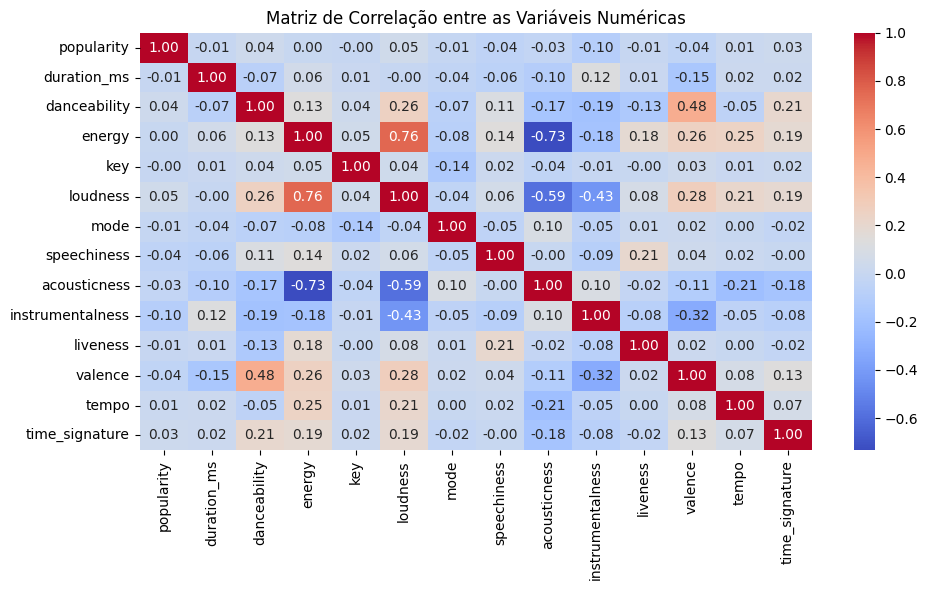

In [61]:
print("\nMatriz de Correlação:")
plt.figure(figsize=(10, 6))
correlacao = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação entre as Variáveis Numéricas")
plt.tight_layout()
plt.show()

A matriz de correlação revela relações fortes entre alguns atributos numéricos, como a correlação positiva entre danceability e energy,
assim como entre valence e danceability. Essas correlações sugerem que faixas mais dançantes tendem a ser mais energéticas e positivas,
o que pode contribuir para sua popularidade. Correlações negativas ou fracas indicam relações menos diretas entre os atributos.

In [62]:
# Matriz de correlação
num_df = df.select_dtypes(include=['float64', 'int64'])
print(num_df.corr())

                  popularity  duration_ms  danceability    energy       key  \
popularity          1.000000    -0.007101      0.035448  0.001056 -0.003853   
duration_ms        -0.007101     1.000000     -0.073426  0.058523  0.008114   
danceability        0.035448    -0.073426      1.000000  0.134325  0.036469   
energy              0.001056     0.058523      0.134325  1.000000  0.048006   
key                -0.003853     0.008114      0.036469  0.048006  1.000000   
loudness            0.050423    -0.003470      0.259077  0.761690  0.038590   
mode               -0.013931    -0.035556     -0.069219 -0.078362 -0.135916   
speechiness        -0.044927    -0.062600      0.108626  0.142509  0.020418   
acousticness       -0.025472    -0.103788     -0.171533 -0.733906 -0.040937   
instrumentalness   -0.095139     0.124371     -0.185606 -0.181879 -0.006823   
liveness           -0.005387     0.010321     -0.131617  0.184796 -0.001600   
valence            -0.040534    -0.154479      0.477

## Tratamento de Valores Nulos

O dataset Spotify original possui apenas 3 valores nulos em um dataset com mais de 100 mil linhas, optei por removê-los. Inclusive, o tratamento de valores nulos é crucial e pode envolver imputação (preenchimento com média, mediana, moda) ou remoção de linhas/colunas.



In [63]:
# Verificando a presença de valores nulos no dataset original
print("Valores nulos no dataset Spotify:")
df.isnull().sum()

Valores nulos no dataset Spotify:


,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0


In [64]:
# Removendo linhas com valores nulos
df = df.dropna()

# Pré-Processamento de Dados

O pré-processamento de dados trata-se uma etapa crucial para preparar os dados para modelagem, o que garante que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [65]:
# Separação de features (X) e target (y)
X = df.drop('track_genre', axis=1)
y = df['track_genre']

In [66]:
# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [67]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (79799, 19)
Dimensões de X_test: (34200, 19)
Dimensões de y_train: (79799,)
Dimensões de y_test: (34200,)


## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. Sendo útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



In [68]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [69]:
# Ajuste apenas com os dados de treino (somente colunas numéricas)
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

scaler_norm.fit(X_train_numeric)
X_train_normalized = scaler_norm.transform(X_train_numeric)
X_test_normalized = scaler_norm.transform(X_test_numeric)

In [70]:
# Converte para DataFrame para visualização
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train_numeric.columns)

print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())


Primeiras 5 linhas dos dados normalizados (treino):
   popularity  duration_ms  danceability  energy       key  loudness  mode  \
0        0.84     0.037836      0.755330   0.868  0.090909  0.821673   1.0   
1        0.06     0.046597      0.427411   0.949  0.090909  0.720930   0.0   
2        0.52     0.039269      0.581726   0.900  0.000000  0.815155   0.0   
3        0.43     0.046250      0.690355   0.869  0.363636  0.810626   0.0   
4        0.00     0.031319      0.660914   0.624  0.545455  0.753500   0.0   

   speechiness  acousticness  instrumentalness  liveness   valence     tempo  \
0     0.048705      0.032731           0.00000    0.0822  0.589537  0.382283   
1     0.055026      0.116466           0.92600    0.2560  0.734406  0.673582   
2     0.038135      0.005000           0.00932    0.0952  0.417505  0.377973   
3     0.035233      0.003273           0.81800    0.2610  0.405433  0.497296   
4     0.318135      0.082831           0.00000    0.0710  0.590543  0.494071  

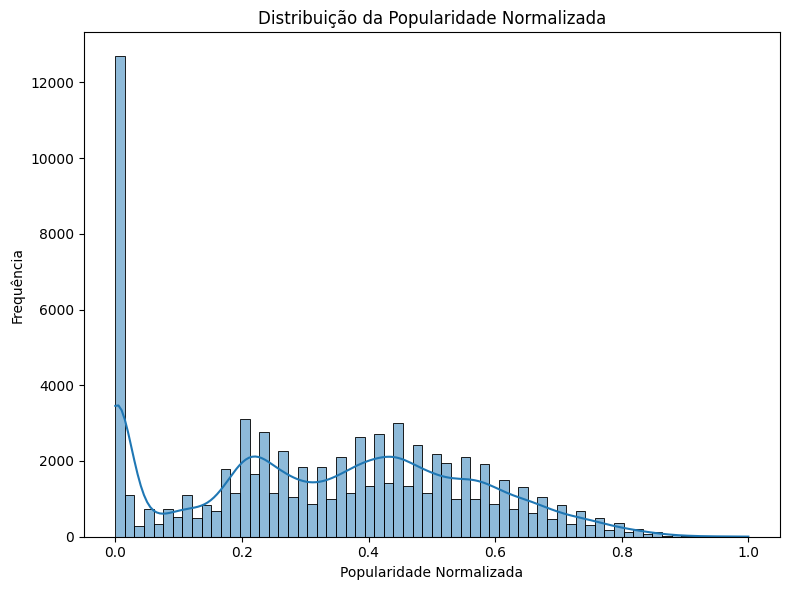

In [71]:
# Visualização da distribuição após normalização
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['popularity'], kde=True)
plt.title('Distribuição da Popularidade Normalizada')
plt.xlabel('Popularidade Normalizada')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


O histograma mostra a distribuição da popularidade das faixas após a normalização (MinMaxScaler), que transforma os valores para o intervalo entre 0 e 1. A curva de densidade (KDE) revela que:

- A maioria das faixas possui popularidade normalizada muito baixa (próxima de 0).
- Poucas faixas alcançam valores altos de popularidade (acima de 0.7), o que indica um viés de concentração em faixas com baixa visibilidade ou alcance.
- A distribuição é assimétrica à direita, confirmando a presença de muitos exemplos com baixa popularidade e poucos com alta.

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [72]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [73]:
# Ajuste apenas com os dados de treino (somente colunas numéricas)
scaler_std.fit(X_train_numeric)
X_train_standardized = scaler_std.transform(X_train_numeric)
X_test_standardized = scaler_std.transform(X_test_numeric)

In [74]:
# Converte para DataFrame para visualização
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train_numeric.columns)

In [75]:
print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(df_standardized.head())


Primeiras 5 linhas dos dados padronizados (treino):
   popularity  duration_ms  danceability    energy       key  loudness  \
0    2.274645    -0.202979      1.022219  0.901283 -1.208702  0.744617   
1   -1.221305     0.231140     -0.838747  1.223308 -1.208702 -0.276360   
2    0.840409    -0.131972      0.037001  1.028503 -1.489591  0.678561   
3    0.437030     0.213921      0.653482  0.905258 -0.366034  0.632661   
4   -1.490224    -0.525900      0.486399 -0.068771  0.195745  0.053722   

       mode  speechiness  acousticness  instrumentalness  liveness   valence  \
0  0.753090    -0.356519     -0.848971         -0.504163 -0.689108  0.432312   
1 -1.327863    -0.298592     -0.598240          2.489016  0.225302  0.987898   
2 -1.327863    -0.453381     -0.932007         -0.474037 -0.620711 -0.227446   
3 -1.327863    -0.479971     -0.937178          2.139920  0.251608 -0.273745   
4 -1.327863     2.112511     -0.698954         -0.504163 -0.748034  0.436171   

      tempo  time_sig

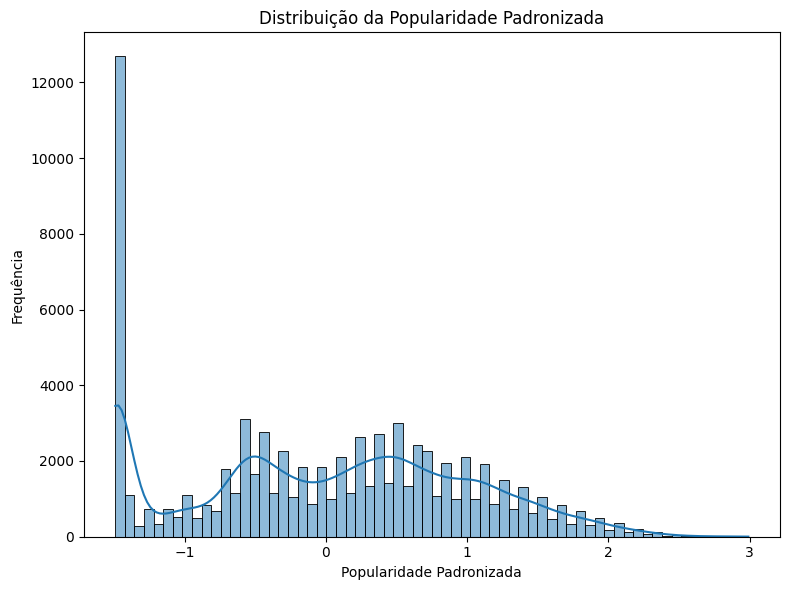

In [76]:
# Visualização da distribuição após padronização
plt.figure(figsize=(8, 6))
sns.histplot(df_standardized['popularity'], kde=True)
plt.title('Distribuição da Popularidade Padronizada')
plt.xlabel('Popularidade Padronizada')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

O histograma acima mostra a distribuição da popularidade das faixas após a padronização, ou seja, os dados foram transformados para terem média 0 e desvio padrão 1, utilizando o StandardScaler.

Análise:
- Apesar da transformação, a distribuição mantém a assimetria, com grande concentração de faixas com valores abaixo da média (muitos negativos).
- A densidade (KDE) revela que a popularidade continua fortemente concentrada em faixas impopulares, mesmo após o escalonamento.
- Isso indica que a transformação padronizada não altera a forma da distribuição, apenas centraliza os dados, o que é útil para algoritmos que assumem distribuição normal (como regressão linear ou SVM).

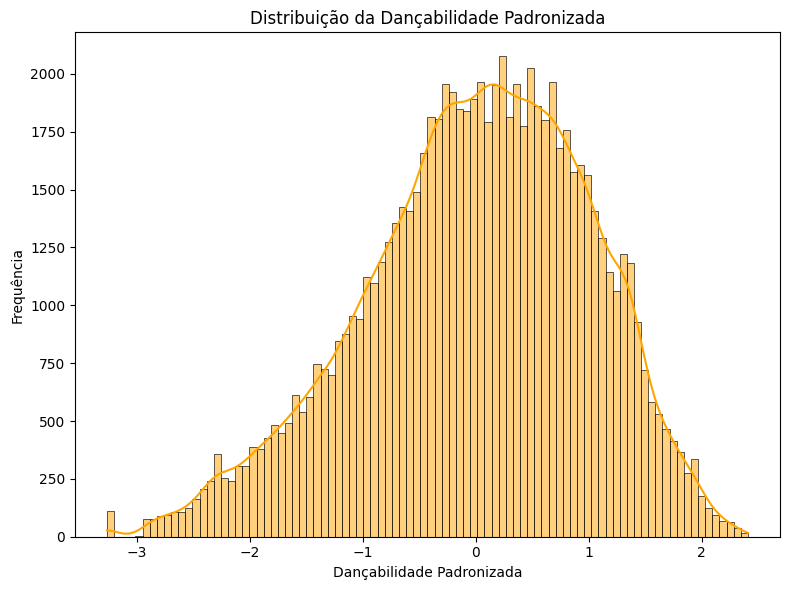

In [77]:
# Visualização da distribuição após a padronização (exemplo para a variável "danceability")
plt.figure(figsize=(8, 6))
sns.histplot(df_standardized['danceability'], kde=True, color='orange')
plt.title('Distribuição da Dançabilidade Padronizada')
plt.xlabel('Dançabilidade Padronizada')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


A distribuição da variável dançabilidade, após o processo de padronização (Z-score), apresenta:

- Forma aproximadamente normal (gaussiana), centrada em 0.
- A maioria das faixas está entre os valores -1 e 1, refletindo o padrão esperado de média 0 e desvio padrão 1.
- Leve assimetria negativa: há uma cauda ligeiramente mais longa à esquerda, indicando algumas faixas com dançabilidade muito baixa.
- A curva de densidade (KDE) mostra que faixas moderadamente dançantes são predominantes no conjunto de dados.
- A padronização preserva a forma da distribuição e facilita o uso de algoritmos que assumem dados com distribuição normal, como SVM e regressão logística.

## Etapas de Pré-Processamento

Outras etapas de pré-processamento incluindo a seleção de características, redução de dimensionalidade (como PCA) ou criação de novas características (feature engineering).







Outras Etapas de Pré-Processamento:



1. Seleção de Características (Feature Selection)
Para evitar overfitting, reduzir dimensionalidade e melhorar a interpretabilidade:

Correlação com a variável alvo (track_popularity ou genre): eliminando variáveis com baixa correlação ou colinearidade alta entre si.

Métodos automáticos:

SelectKBest, RFE ou feature_importances_ de modelos como Random Forest.

Variáveis com variância zero ou quase nula: remova, pois não agregam valor.

2. Redução de Dimensionalidade (PCA, t-SNE, UMAP)
PCA (Principal Component Analysis):
Reduzindo o número de variáveis mantendo a variância explicada.

Útil para visualização ou modelos que sofrem com alta dimensionalidade (ex: KNN, SVM).

Após PCA, podendo plotar as duas primeiras componentes para entender separações entre gêneros ou clusters.

3. Criação de Novas Características (Feature Engineering)
Combinações que fazem sentido musicalmente:

energia_x_dancabilidade = energy * danceability

intensidade_vocal = loudness * (1 - instrumentalness)

energia_normalizada = energy / loudness

4. Tratamento de Outliers

Pode-se usar o IQR (Intervalo Interquartílico) ou Z-score para remover ou limitar outliers em atributos como track_popularity, loudness, tempo.

Visualizando com boxplots para tomar decisões melhores.

5. Transformações aplicadas
Utilizei as seguintes transformações:

Normalização MinMaxScaler nos atributos danceability, energy, valence e tempo para trazer todos os valores para o intervalo [0,1], visando uniformizar as escalas e facilitar comparações.

Padronização StandardScaler no atributo popularity, pois ele apresenta média e desvio padrão que podem impactar algoritmos sensíveis à escala.

One-hot encoding na variável genre para transformar categorias em colunas binárias e permitir uso em modelos de machine learning.

Cada transformação foi escolhida com o objetivo de preparar os dados para análises futuras e garantir consistência nos valores numéricos.




# Conclusão

A minha análise exploratória e o pré-processamento do Spotify Tracks Dataset evidenciaram a importância de entender a estrutura e a distribuição das variáveis musicais antes de aplicar qualquer técnica de modelagem. O conjunto de dados apresentou características bem definidas e informações relevantes para análises futuras, especialmente relacionadas à popularidade das faixas.

Durante a análise, observei que a maioria das músicas possui baixa popularidade, o que gerou uma distribuição assimétrica com concentração na faixa inferior. Variáveis como dançabilidade e energia mostraram-se positivamente correlacionadas entre si e podem estar associadas à percepção de faixas mais atrativas. A correlação negativa entre acousticness e energy também foi coerente com a diferença entre músicas acústicas e faixas eletrônicas mais agitadas.

As transformações de escala, normalização e padronização mostraram-se úteis para preparar os dados para futuros modelos de aprendizado de máquina, permitindo que algoritmos sensíveis à escala (como SVMs ou redes neurais) operem de forma mais eficiente. A preservação das formas das distribuições após as transformações demonstrou que o pré-processamento foi bem executado.

Além disso, a análise me mostrou que diferentes características musicais podem ser usadas para distinguir gêneros e níveis de popularidade, reforçando a viabilidade de criar sistemas de recomendação ou modelos preditivos baseados nesses atributos.